In [24]:
# Packages

# Standard
import pandas as pd
import numpy as np

# Plot
import matplotlib.pyplot as plt
%matplotlib inline

# Deep Learning
import tensorflow as tf
from tensorflow import keras

In [25]:
# Loading Dataser From Keras
(X_train,y_train) ,(X_test,y_test) = keras.datasets.mnist.load_data()

In [26]:
X_train.shape

(60000, 28, 28)

In [27]:
y_train.shape

(60000,)

In [28]:
X_test.shape

(10000, 28, 28)

In [29]:
y_test.shape

(10000,)

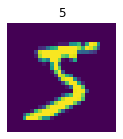

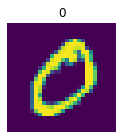

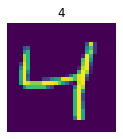

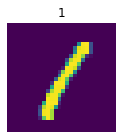

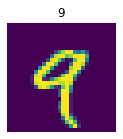

In [30]:
# Sample Images
for i in range(5):
    plt.figure(figsize=(2,2))
    plt.imshow(X_train[i])
    plt.title(y_train[i])
    plt.axis('off')
    plt.show()

In [36]:
# Scaling Values
X_train = X_train / 255
X_test = X_test / 255

In [38]:
# Flattening X_train
X_train_flattened = X_train.reshape(len(X_train),len(X_train[0])**2)
X_train_flattened.shape

(60000, 784)

In [39]:
# Flattening X_test
X_test_flattened = X_test.reshape(len(X_test),len(X_test[0])**2)
X_test_flattened.shape

(10000, 784)

In [41]:
# Creating Simple Neural Network
input_size = len(X_train_flattened[0])

model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(input_size,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 901us/step - loss: 0.7219 - accuracy: 0.8147
Epoch 2/10
1875/1875 [==============================] - 2s 880us/step - loss: 0.3118 - accuracy: 0.9128
Epoch 3/10
1875/1875 [==============================] - 2s 842us/step - loss: 0.2850 - accuracy: 0.9216
Epoch 4/10
1875/1875 [==============================] - 2s 878us/step - loss: 0.2690 - accuracy: 0.9255
Epoch 5/10
1875/1875 [==============================] - 2s 865us/step - loss: 0.2594 - accuracy: 0.9276
Epoch 6/10
1875/1875 [==============================] - 2s 891us/step - loss: 0.2584 - accuracy: 0.9269
Epoch 7/10
1875/1875 [==============================] - 2s 885us/step - loss: 0.2588 - accuracy: 0.9289
Epoch 8/10
1875/1875 [==============================] - 2s 875us/step - loss: 0.2559 - accuracy: 0.9294
Epoch 9/10
1875/1875 [==============================] - 2s 941us/step - loss: 0.2485 - accuracy: 0.9307
Epoch 10/10
1875/1875 [==============================] - 2s 901u

In [42]:
# Evaluating Model On Test Dataset
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 778us/step - loss: 0.2654 - accuracy: 0.9280


[0.2654423117637634, 0.9279999732971191]

In [43]:
# Predicting Test Dataset
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([4.08193469e-03, 1.35907250e-08, 1.64536536e-02, 9.71925735e-01,
       1.35672092e-03, 1.20539755e-01, 2.42178295e-08, 9.99812663e-01,
       1.18778914e-01, 7.50700116e-01], dtype=float32)

In [44]:
# Getting Max Probability of y_predicted index 0
np.argmax(y_predicted[0])

7

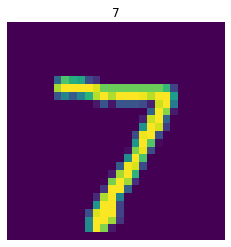

In [45]:
# Actual
plt.imshow(X_test[0])
plt.title(y_test[0])
plt.axis('off')
plt.show()

In [47]:
# Confusion Matrix
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   5,    8,  930,   15,    7,    3,   13,    8,   38,    5],
       [   3,    0,   17,  920,    0,   25,    2,    9,   25,    9],
       [   1,    1,    5,    2,  908,    0,   10,    4,   11,   40],
       [  10,    2,    1,   31,    7,  784,   12,    7,   32,    6],
       [  11,    3,    8,    1,    7,   12,  912,    1,    3,    0],
       [   1,    6,   23,    9,    7,    1,    0,  934,    4,   43],
       [   5,    6,    6,   20,    9,   20,    7,    7,  883,   11],
       [  10,    7,    1,    9,   20,    5,    0,   11,   10,  936]])>

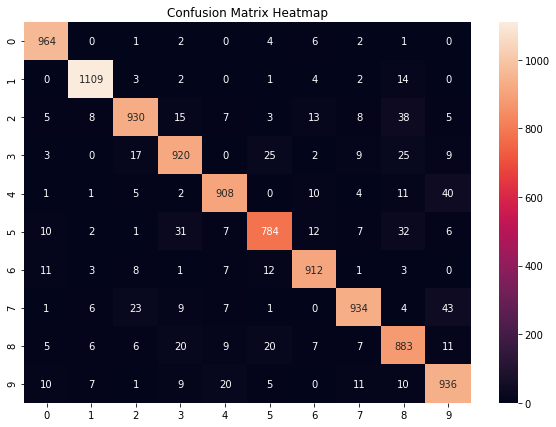

In [51]:
# Heatmap
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.title("Confusion Matrix Heatmap")
plt.show()

In [55]:
# Adding Hidden Layer
input_size = len(X_train_flattened[0])

model = keras.Sequential([
    keras.layers.Dense(200,input_shape=(input_size,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3920 - accuracy: 0.8847
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1017 - accuracy: 0.9710
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0660 - accuracy: 0.9801
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0470 - accuracy: 0.9857: 1s - ETA: 0s - loss: 0 - ETA: 0s - loss: 0.0467 - ac
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0332 - accuracy: 0.9897
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0242 - accuracy: 0.9927
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0209 - accuracy: 0.9931: 1s - loss: 0.0202  - ETA: 1s - loss: 0.020 - ETA: 0s - los
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0153 - accuracy: 0.9952
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - 

In [56]:
# Evaluating Model
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 948us/step - loss: 0.0862 - accuracy: 0.9777


[0.08621717244386673, 0.9776999950408936]

In [57]:
# Confusion Matrix
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   5,    8,  930,   15,    7,    3,   13,    8,   38,    5],
       [   3,    0,   17,  920,    0,   25,    2,    9,   25,    9],
       [   1,    1,    5,    2,  908,    0,   10,    4,   11,   40],
       [  10,    2,    1,   31,    7,  784,   12,    7,   32,    6],
       [  11,    3,    8,    1,    7,   12,  912,    1,    3,    0],
       [   1,    6,   23,    9,    7,    1,    0,  934,    4,   43],
       [   5,    6,    6,   20,    9,   20,    7,    7,  883,   11],
       [  10,    7,    1,    9,   20,    5,    0,   11,   10,  936]])>

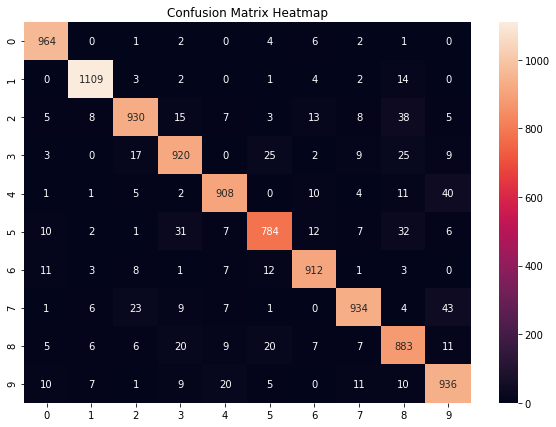

In [58]:
# Confusion Matrix Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.title("Confusion Matrix Heatmap")
plt.show()